In [1]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers

from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
# Import precleaned text data
input_prefix = '20newsgroups_pols_cleaned_nh'

df_train = pd.read_csv(input_prefix + '_train.csv')
df_test = pd.read_csv(input_prefix + '_test.csv')

In [3]:
# Split of targets
y_train = df_train['target']
y_test = df_test['target']

In [4]:
# One Hot encode target data
encoder = OneHotEncoder(sparse=False)

y_train = encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = encoder.fit_transform(y_test.values.reshape(-1,1))

C:\Users\brbenson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\brbenson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [5]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_train.text)

X_train = tokenizer.texts_to_sequences(df_train.text)
X_test = tokenizer.texts_to_sequences(df_test.text)

# Save total number of words in vocabulary to be used later
vocab_size = len(tokenizer.word_index) + 1

In [6]:
# Set max length of text vector for each article
maxlen = 2000

# Pad articles with fewer than maxlen tokens
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [8]:
# Define plotting function to show accuracy/loss vs. epoch
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [9]:
# 2 layer Dense NN with untrained Word embedding vectors
embedding_dim = 300

model = Sequential()

model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           1534350   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250010    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 1,784,404
Trainable params: 1,784,404
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9992
Testing Accuracy:  0.8845


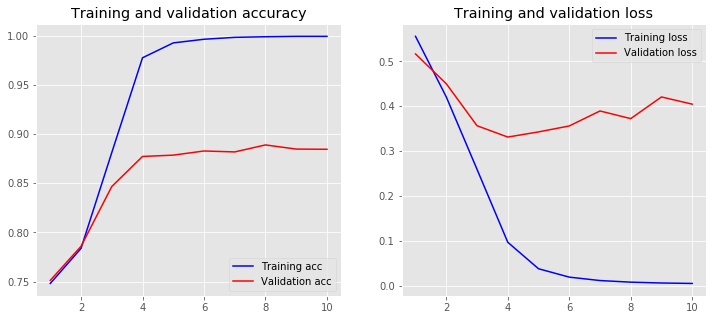

In [10]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [11]:
# 4 Layer Dense NN with untrained word embedding vectors

model_3 = Sequential()

model_3.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model_3.add(layers.GlobalMaxPool1D())
model_3.add(layers.Dense(250, activation='relu'))
model_3.add(layers.Dense(100, activation='relu'))
model_3.add(layers.Dense(50, activation='relu'))
model_3.add(layers.Dense(4, activation='sigmoid'))
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 50)           1534350   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               12750     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 204       
Total params: 1,577,454
Trainable params: 1,577,454
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8743


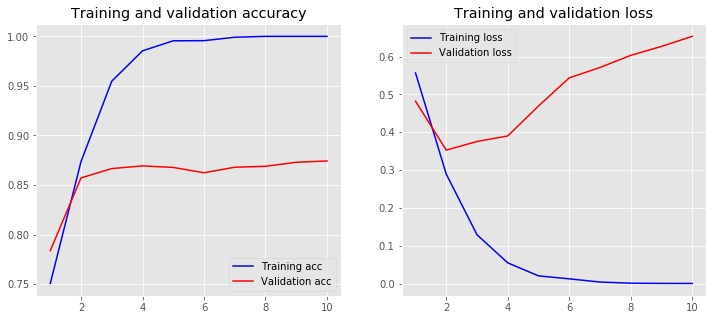

In [12]:
history_3 = model_3.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model_3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_3)

In [55]:
# 3 layer CNN with max pooling and untrained word embedding vectors

model_4 = Sequential()

model_4.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model_4.add(layers.Conv1D(128, 5, activation='relu'))
model_4.add(layers.MaxPool1D())
model_4.add(layers.Conv1D(128, 5, activation='relu'))
model_4.add(layers.MaxPool1D())
model_4.add(layers.Conv1D(128, 5, activation='relu'))
model_4.add(layers.MaxPool1D())
model_4.add(layers.Flatten())
model_4.add(layers.Dense(128, activation='relu'))
model_4.add(layers.Dense(4, activation='softmax'))
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 50)           1534350   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 496, 128)          32128     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 248, 128)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 244, 128)          82048     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 122, 128)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 118, 128)          82048     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 59, 128)           0         
__________

Training Accuracy: 0.9912
Testing Accuracy:  0.8480


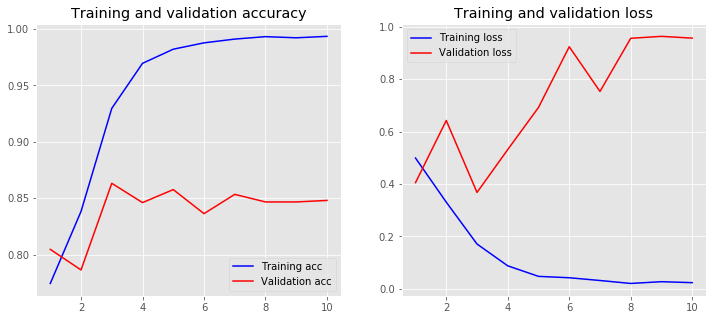

In [56]:
history_4 = model_4.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model_4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_4)

In [60]:
# 3 layer CNN with dropout, batch normalization and untrained word embedding vectors

model_5 = Sequential()

model_5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model_5.add(layers.Conv1D(128, 5, activation='relu'))
model_5.add(layers.Dropout(0.1))
model_5.add(layers.normalization.BatchNormalization())
model_5.add(layers.MaxPool1D())
model_5.add(layers.Conv1D(128, 5, activation='relu'))
model_5.add(layers.Dropout(0.1))
model_5.add(layers.normalization.BatchNormalization())
model_5.add(layers.MaxPool1D())
model_5.add(layers.Conv1D(128, 5, activation='relu'))
model_5.add(layers.Dropout(0.1))
model_5.add(layers.normalization.BatchNormalization())
model_5.add(layers.MaxPool1D())

model_5.add(layers.Bidirectional(layers.LSTM(128, 
                                             return_sequences=False, 
                                             dropout=0.15, 
                                             recurrent_dropout=0.15, 
                                             implementation=0)))

model_5.add(layers.Dropout(0.3))

model_5.add(layers.Dense(128, activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Dense(4, activation='softmax'))
model_5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 50)           1534350   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 496, 128)          32128     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 248, 128)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 244, 128)          82048     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 122, 128)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 118, 128)          82048     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 59, 128)           0         
__________

Training Accuracy: 0.9990
Testing Accuracy:  0.8757


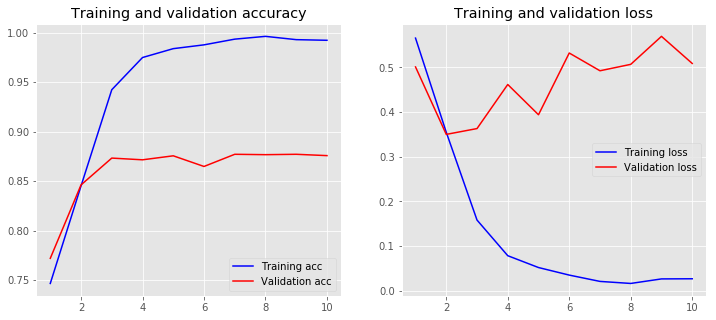

In [61]:
history_5 = model_5.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model_5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_5)

In [71]:
# Single Layer RNN (LSTM) with dropout and untrained word embedding vectors
model_7 = Sequential()

model_7.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model_7.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))

model_7.add(layers.Dense(4, activation='sigmoid'))
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 500, 50)           1534350   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 516       
Total params: 1,626,514
Trainable params: 1,626,514
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.7664
Testing Accuracy:  0.7560


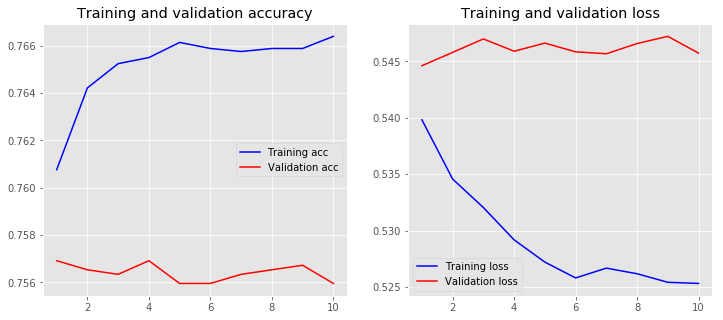

In [73]:
history_7 = model_7.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model_7.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_7.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_7)